# Loading librarys


In [ ]:
!pip install minisom

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [ ]:
# Evaluate performance
from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Data preprocessing

In [ ]:

# Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
#self made data
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/som_data.csv"

# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv"

#new 2s splits
#filled
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/caida2007/csv/2ssplit%20combined%20dataset%20CAIDA%202007%20filled.csv"
#unfilled
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/caida2007/csv/2ssplit%20combined%20dataset%20CAIDA%202007%20unfilled.csv"


df = pd.read_csv(url)



In [ ]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     1828 non-null   float64
 1   etpSrcP      1828 non-null   float64
 2   etpDstP      1828 non-null   float64
 3   etpProtocol  1828 non-null   float64
 4   totalPacket  1828 non-null   float64
 5   bandwidth    1828 non-null   float64
 6   label        1828 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 100.1 KB
None
          etpSrcIP      etpSrcP      etpDstP  etpProtocol   totalPacket  \
count  1828.000000  1828.000000  1828.000000  1828.000000    1828.00000   
mean      8.756125     1.060106     0.865947     0.350335  196688.50930   
std       4.466604     0.551593     0.816996     0.206410  155065.65289   
min       2.229938    -0.000000    -0.000000    -0.000000     446.00000   
25%       2.646995     0.698247     0.411227     0.348137     774.00000   
50%      

In [ ]:
# # Check if the column exists
# column_to_drop = 'bandwidth'
# if column_to_drop in df.columns:
#     # Drop the column
#     df.drop(columns=[column_to_drop], inplace=True)
#     print(f"\n'{column_to_drop}' column dropped.")

In [ ]:
df.shape

(1828, 7)

In [ ]:
# Define the columns to exclude from normalization
exclude_cols = ['label']  # Add more columns here if needed

# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in df.columns:
    if col not in exclude_cols:
        mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements
print("mean_std_dict", mean_std_dict)

   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  bandwidth  label
0  0.430638  0.405071  0.447202     0.415942     0.437139   0.437097      0
1  0.430642  0.405071  0.447202     0.415942     0.437129   0.437087      0
2  0.430886  0.419931  0.454199     0.443348     0.437142   0.437102      0
3  0.430806  0.406384  0.448111     0.419482     0.437148   0.437106      0
4  0.429843  0.481730  0.471192     0.510745     0.437170   0.437139      0
mean_std_dict {'etpSrcIP': (8.756124716939265, 4.466603853932388), 'etpSrcP': (1.060106223909143, 0.5515926429597584), 'etpDstP': (0.865946746235263, 0.8169963360133998), 'etpProtocol': (0.35033490480097373, 0.2064099100881174), 'totalPacket': (196688.50929978117, 155065.65289005972), 'bandwidth': (5797758.35010941, 4568569.9841586575)}


## DEciding

In [ ]:
# Filter rows where label equals 0
filtered_df = normalized_df[normalized_df['label'] == 0]

#else withut label 0 filter
# filtered_df = normalized_df

# Concatenate the filtered rows into a new DataFrame
result_df = pd.concat([filtered_df[col] for col in filtered_df.columns], axis=1)

# Reset index if needed
result_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(result_df)
traindf = (result_df)


     etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  bandwidth  label
0    0.430638  0.405071  0.447202     0.415942     0.437139   0.437097      0
1    0.430642  0.405071  0.447202     0.415942     0.437129   0.437087      0
2    0.430886  0.419931  0.454199     0.443348     0.437142   0.437102      0
3    0.430806  0.406384  0.448111     0.419482     0.437148   0.437106      0
4    0.429843  0.481730  0.471192     0.510745     0.437170   0.437139      0
..        ...       ...       ...          ...          ...        ...    ...
595  0.430022  0.459565  0.466055     0.490334     0.437162   0.437128      0
596  0.431032  0.409131  0.449602     0.425302     0.437141   0.437099      0
597  0.430471  0.422531  0.455083     0.446836     0.437164   0.437123      0
598  0.430594  0.406326  0.448071     0.419325     0.437161   0.437118      0
599  0.430448  0.416653  0.452890     0.438195     0.437155   0.437114      0

[600 rows x 7 columns]


In [ ]:
X = normalized_df.iloc[:, :-1].values
y = normalized_df.iloc[:, -1].values


In [ ]:
trainX = traindf.iloc[:, :-1].values
trainy = traindf.iloc[:, -1].values

Column Name		Missing Values
----------------------------------
etpSrcIP			0
etpSrcP			0
etpDstP			0
etpProtocol			0
totalPacket			0
bandwidth			0
label			0


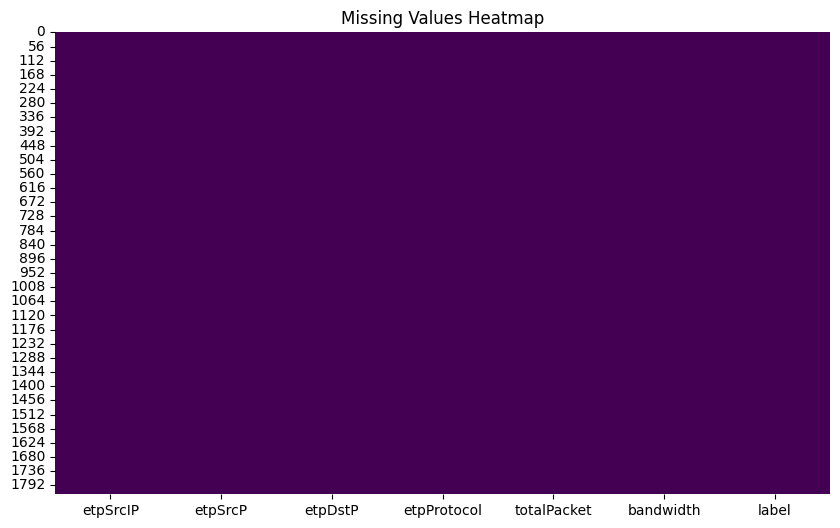

In [ ]:
# Listing columns and their respective number of missing values
missing_values = df.isnull().sum()

# Displaying the missing values
print("Column Name\t\tMissing Values")
print("----------------------------------")
for column, missing_count in missing_values.items():
    print(f"{column}\t\t\t{missing_count}")

# Creating a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# data visualization


# Pre processing


In [ ]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# choices on data

# SOM definition

In [ ]:
# Initialize and train SOM
som_size = 30  # Example size, adjust based on your dataset

In [ ]:
som = MiniSom(som_size, som_size, X_train.shape[1], sigma=15, learning_rate=0.1, random_seed=0 )



In [ ]:
som.random_weights_init(trainX)

In [ ]:
u_matrixfirst = som.distance_map()  # Get the U-matrix

In [ ]:
som.train_batch(trainX, 1000, verbose = "true")

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.00829441450938314


In [ ]:
u_matrixlast = som.distance_map()  # Get the U-matrix

## Saving

In [ ]:
# with open('som.p', 'rb') as infile:
#     som = pickle.load(infile)

# Evaluation

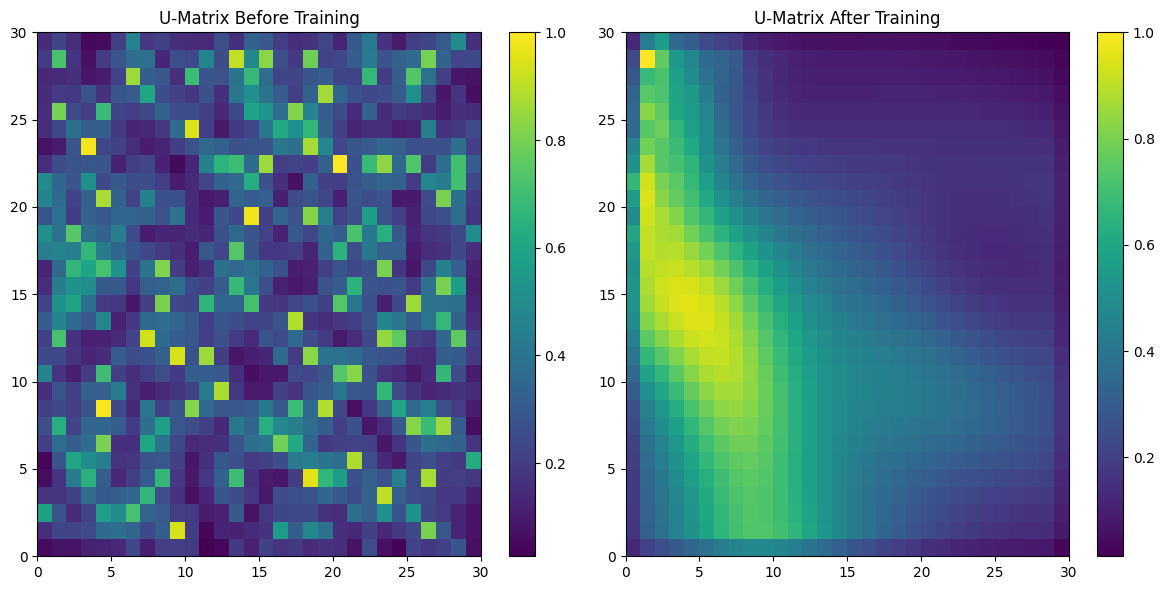

In [ ]:
# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
# testvalues = X_test
# testvalues = X_train
testvalues = X
# testlabels = y_train
testlabels = y


# Prediction


In [ ]:
# Calculate the reference point G
g = np.median(som.get_weights(), axis=(0, 1))

# Function to calculate distance between input sample V and reference point G
def calculate_distance(v, g):
    return np.linalg.norm(v - g)

# Function to classify input sample as attack or normal and update y_pred array
def classify_and_update(sample, d_threshold, sigma, y_pred):
  for sam in sample:
    distance_to_g = calculate_distance(sam, g)
    # print("distance_to_g", distance_to_g)
    p_d_greater_than_x = 1 - np.exp(- (distance_to_g / sigma)**2)  # Cumulative distribution function
    is_attack = distance_to_g > d_threshold or p_d_greater_than_x > 0.6  # You can adjust the threshold as needed
    y_pred.append(1 if is_attack else 0)


In [ ]:

# Example usage
input_sample = testvalues  # Example input sample (you can replace this with your actual data)
d_threshold = 0.13309999999999966  # Predefined distance threshold
# d_threshold = 0.1  # Predefined distance threshold
# d_threshold = 0.10900000000000001
  # Predefined distance threshold
sigma =  0.139099999999999  # Probability threshold
# sigma = 0.2  # Probability threshold
# sigma = 0.11400000000000002
 # Probability threshold


y_pred = []  # Initialize the y_pred array
print(y_pred)
# Classify the input sample and update y_pred array
classify_and_update(input_sample, d_threshold, sigma, y_pred)

print("Predicted labels for the input sample:", y_pred)
ypred = np.array(y_pred)

[]
Predicted labels for the input sample: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 

# Evaluate 2.0


In [ ]:


# print(classification_report(y_test, y_pred, zero_division=1))
print(classification_report(testlabels, y_pred, zero_division=1))
# Calculate False Detection Rate (FDR)
# precision_recall = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
precision_recall = classification_report(testlabels, y_pred, output_dict=True, zero_division=1)
precision_ddos = precision_recall['1']  # Assuming '1' represents DDoS class

FDR = (1 - precision_ddos['precision'])* 100
print(f"False Detection Rate (FDR): {FDR:.2f}%")

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       600
           1       0.93      0.98      0.96      1228

    accuracy                           0.94      1828
   macro avg       0.94      0.92      0.93      1828
weighted avg       0.94      0.94      0.94      1828

False Detection Rate (FDR): 6.68%


## ROC



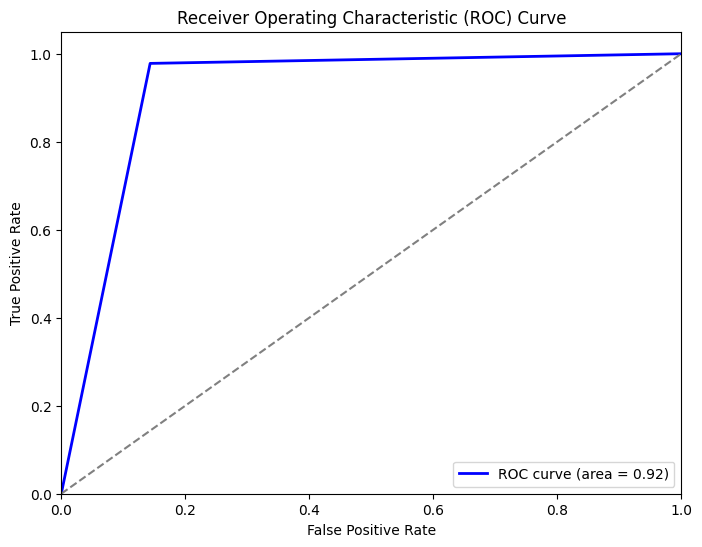

In [ ]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(testlabels, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#Config


In [ ]:
# Define the range and step size for sigma and d_threshold
sigma_min = 0.001
sigma_max = 1
sigma_step = 0.001

d_threshold_min = 0.001
d_threshold_max = 1
d_threshold_step = 0.001


In [ ]:



# Generate arrays of varying values for sigma and d_threshold
sigma_values = np.arange(sigma_min, sigma_max + sigma_step, sigma_step)
d_threshold_values = np.arange(d_threshold_min, d_threshold_max + d_threshold_step, d_threshold_step)



# Print the generated values
print("Sigma values:", sigma_values)
print("d_threshold values:", d_threshold_values)

# Initialize an empty dataframe
df_results = pd.DataFrame(columns=['sigma', 'd_threshold', 'accuracy', 'FDR'])
max = len(sigma_values)*len(d_threshold_values)
i=1




# Initialize an empty list to store results
results_list = []

# Example usage loop to calculate accuracy and FDR for each parameter combination
for sigma in sigma_values:
    for d_threshold in d_threshold_values:
        y_pred = []  # Initialize y_pred for each combination of parameters
        classify_and_update(input_sample, d_threshold, sigma, y_pred)
        ypred = np.array(y_pred)

        # Evaluate performance
        report = classification_report(testlabels, y_pred, zero_division=1, output_dict=True)
        accuracy = report['accuracy']

        # Calculate False Detection Rate (FDR)
        precision_recall = report['1']  # Assuming '1' represents DDoS class
        FDR = (1 - precision_recall['precision']) * 100

        # Append the results to the list
        results_list.append({'sigma': sigma, 'd_threshold': d_threshold, 'accuracy': accuracy, 'FDR': FDR})
        print(f"\r{i} OF {max}")
        i=i+1

# Create the DataFrame after the loop
df_results = pd.DataFrame(results_list)

# Print the dataframe for analysis
print(df_results)





Streaming output truncated to the last 5000 lines.
57218 OF 1000000
57219 OF 1000000
57220 OF 1000000
57221 OF 1000000
57222 OF 1000000
57223 OF 1000000
57224 OF 1000000
57225 OF 1000000
57226 OF 1000000
57227 OF 1000000
57228 OF 1000000
57229 OF 1000000
57230 OF 1000000
57231 OF 1000000
57232 OF 1000000
57233 OF 1000000
57234 OF 1000000
57235 OF 1000000
57236 OF 1000000
57237 OF 1000000
57238 OF 1000000
57239 OF 1000000
57240 OF 1000000
57241 OF 1000000
57242 OF 1000000
57243 OF 1000000
57244 OF 1000000
57245 OF 1000000
57246 OF 1000000
57247 OF 1000000
57248 OF 1000000
57249 OF 1000000
57250 OF 1000000
57251 OF 1000000
57252 OF 1000000
57253 OF 1000000
57254 OF 1000000
57255 OF 1000000
57256 OF 1000000
57257 OF 1000000
57258 OF 1000000
57259 OF 1000000
57260 OF 1000000
57261 OF 1000000
57262 OF 1000000
57263 OF 1000000
57264 OF 1000000
57265 OF 1000000
57266 OF 1000000
57267 OF 1000000
57268 OF 1000000
57269 OF 1000000
57270 OF 1000000
57271 OF 1000000
57272 OF 1000000
57273 OF 10000

KeyboardInterrupt: 

In [ ]:
print(df_results)

Empty DataFrame
Columns: [sigma, d_threshold, accuracy, FDR]
Index: []


In [ ]:
df_results

,sigma,d_threshold,accuracy,FDR


## Graphical

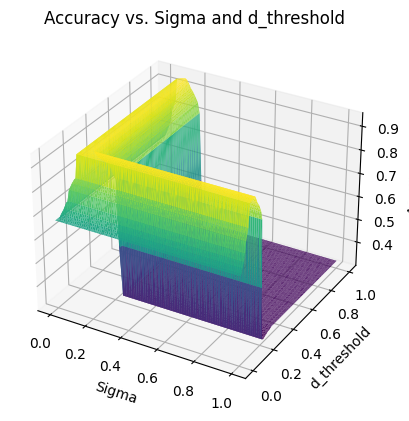

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_results contains the data from the previous code snippet

# Convert dataframe columns to numpy arrays for plotting
sigma_values = df_results['sigma'].values
d_threshold_values = df_results['d_threshold'].values
accuracy_values = df_results['accuracy'].values

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(sigma_values, d_threshold_values, accuracy_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('Sigma')
ax.set_ylabel('d_threshold')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. Sigma and d_threshold')

# Show the plot
plt.show()


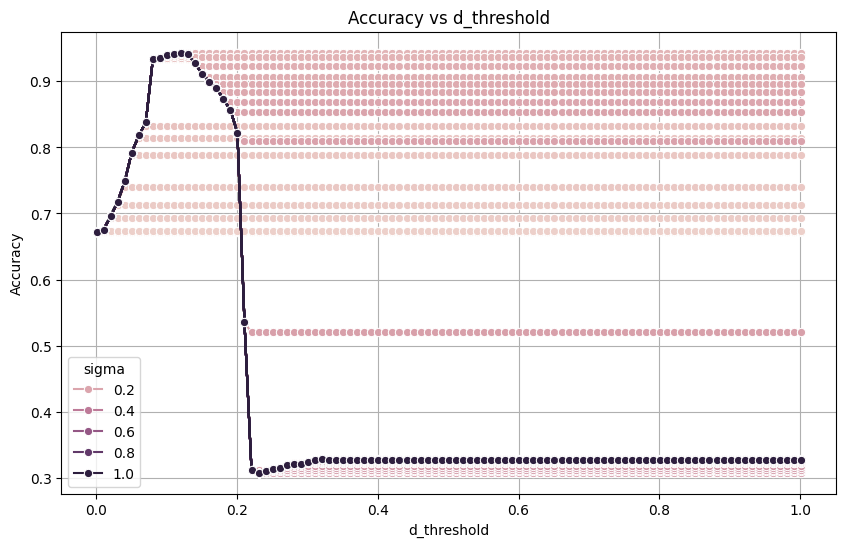

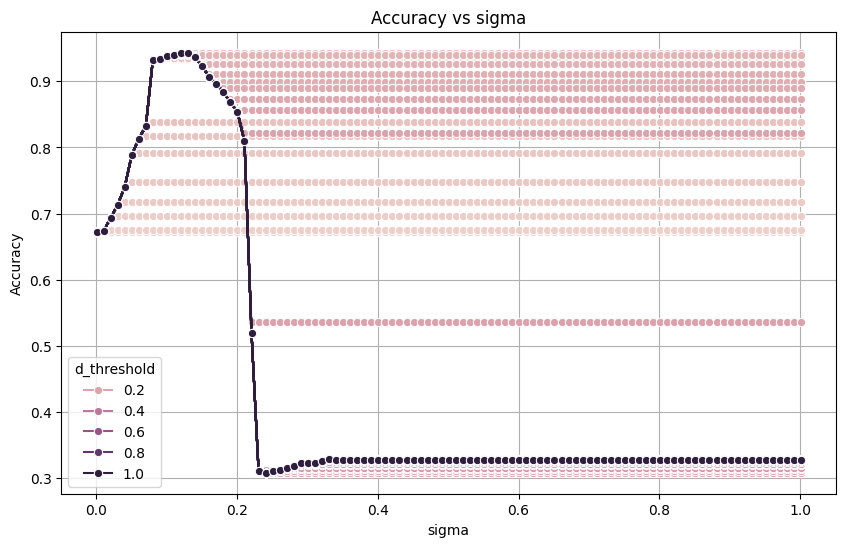

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting changes in accuracy with respect to d_threshold
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='d_threshold', y='accuracy', hue='sigma', marker='o')
plt.title('Accuracy vs d_threshold')
plt.xlabel('d_threshold')
plt.ylabel('Accuracy')
plt.legend(title='sigma')
plt.grid(True)
plt.show()

# Plotting changes in accuracy with respect to sigma
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='sigma', y='accuracy', hue='d_threshold', marker='o')
plt.title('Accuracy vs sigma')
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.legend(title='d_threshold')
plt.grid(True)
plt.show()


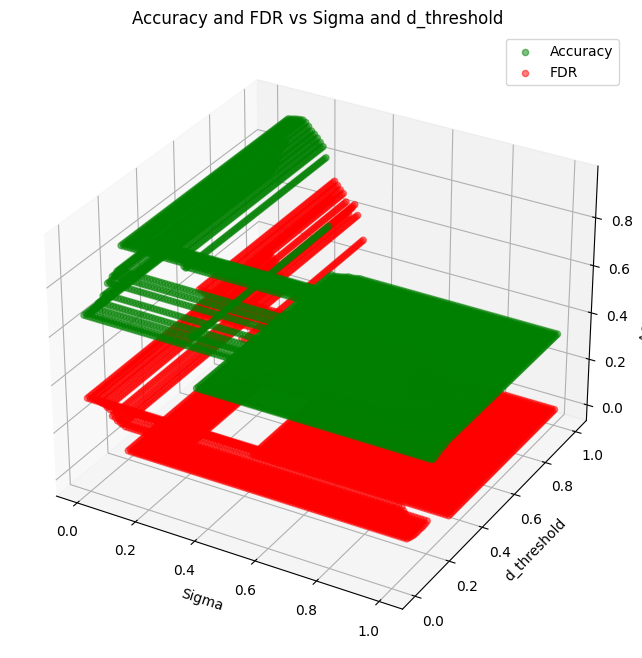

In [ ]:
# Assuming df is your pandas DataFrame containing columns sigma, d_threshold, accuracy, FDR

# Extracting data
sigma = df_results['sigma']
d_threshold = df_results['d_threshold']
accuracy = df_results['accuracy']
fdr = df_results['FDR'] / 100  # Normalize FDR by dividing by 100

# Creating the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Accuracy
ax.scatter(sigma, d_threshold, accuracy, c='green', label='Accuracy', alpha=0.5)

# Scatter plot for FDR
ax.scatter(sigma, d_threshold, fdr, c='red', label='FDR', alpha=0.5)

ax.set_title('Accuracy and FDR vs Sigma and d_threshold')
ax.set_xlabel('Sigma')
ax.set_ylabel('d_threshold')
ax.set_zlabel('Accuracy / FDR')
ax.legend()
plt.show()

In [ ]:
# Assuming df_results contains the data from the previous code snippets

# Find the row with maximum accuracy
max_accuracy_row = df_results[df_results['accuracy'] == df_results['accuracy'].max()]
print("max_accuracy_row",max_accuracy_row)

# Extract the corresponding sigma and d_threshold values
max_sigma = max_accuracy_row['sigma'].values[0]
max_d_threshold = max_accuracy_row['d_threshold'].values[0]
max_accuracy = max_accuracy_row['accuracy'].values[0]

# Print the range of sigma and d_threshold values for maximum accuracy
print(f"Range of sigma for maximum accuracy: {max_sigma}")
print(f"Range of d_threshold for maximum accuracy: {max_d_threshold}")
print(f"Maximum accuracy: {max_accuracy}")


max_accuracy_row        sigma  d_threshold  accuracy       FDR
1325   0.131        0.121  0.943107  6.835637
1326   0.131        0.131  0.943107  6.769231
1327   0.131        0.141  0.943107  6.769231
1328   0.131        0.151  0.943107  6.769231
1329   0.131        0.161  0.943107  6.769231
...      ...          ...       ...       ...
9708   0.961        0.121  0.943107  6.835637
9809   0.971        0.121  0.943107  6.835637
9910   0.981        0.121  0.943107  6.835637
10011  0.991        0.121  0.943107  6.835637
10112  1.001        0.121  0.943107  6.835637

[176 rows x 4 columns]
Range of sigma for maximum accuracy: 0.13099999999999998
Range of d_threshold for maximum accuracy: 0.12099999999999998
Maximum accuracy: 0.9431072210065645


#Test with

In [ ]:
yrtimepred = []
sam = []

# for i in range(5):
#   sam.append(input(f"Value{i+1}"))
# sam.append(['src_ip_entropy','src_port_entropy','dst_port_entropy','protocol_entropy','total_packets'])

# Define the data list
# sam = [1.0,-0.0,-0.0,-0.0,64] #0
# sam = [1.9709505944546686,1.5709505944546684,1.5709505944546684,0.9709505944546686,158] #0
# sam = [10.385063050290164,10.358267802980203,0.012464058820862642,0.012464058820862642,129] #1
# sam.append(sam1)
# print("input", sam)
# sam = [sam]


# Define the columns list (as a tuple, since it represents column names)
# columns = ('src_ip_entropy', ' src_port_entropy', ' dst_port_entropy', ' protocol_entropy', ' total_packets')
columns = ('etpSrcIP', 'etpSrcP', 'etpDstP', 'etpProtocol', 'totalPacket')
# Create a Pandas DataFrame
df = pd.DataFrame([sam], columns=columns)
# print("df", df)
sam_pre = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)
sam_pre = np.array(sam_pre)
# print("sam_pre", sam_pre)
# print("sam", sam)
classify_and_update(sam_pre, d_threshold, sigma, yrtimepred)
# print("yrtimepred", yrtimepred)
if yrtimepred == [1]:
  print("Attack")
else:
  print("Normal")
# print(len(yrtimepred))

ValueError: 5 columns passed, passed data had 0 columns

# Further!!!

# NExtra
